### Loading the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.0-cp313-cp313-win_amd64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 480.4 kB/s eta 0:00:23
   -- ------------------------------------- 0.8/11.5 MB 691.2 kB/s eta 0:00:16
   -- ------------------------------------- 0.8/11.5 MB

In [ ]:
%pip install seaborn scipy
import seaborn as sns
from scipy.stats import kruskal

   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
    --------------------------------------- 0.8/41.0 MB 4.8 MB/s eta 0:00:09
   - -------------------------------------- 1.6/41.0 MB 5.8 MB/s eta 0:00:07
   -- ------------------------------------- 2.9/41.0 MB 5.1 MB/s eta 0:00:08
   ---- ----------------------------------- 4.2/41.0 MB 5.1 MB/s eta 0:00:08
   ----- ---------------------------------- 6.0/41.0 MB 6.5 MB/s eta 0:00:06
   ------- -------------------------------- 8.1/41.0 MB 6.5 MB/s eta 0:00:06
   --------- ------------------------------ 10.2/41.0 MB 7.0 MB/s eta 0:00:05
   ----------- ---------------------------- 12.1/41.0 MB 7.2 MB/s eta 0:00:05
   ------------- -------------------------- 13.4/41.0 MB 7.1 MB/s eta 0:00:04
   ---------------- ----------------------- 16.5/41.0 MB 7.9 MB/s eta 0:00:04
   ----------------- ---------------------- 17.8/41.0 MB 7.7 MB/s eta 0:00:04
   ------------------ --------------------- 18.9/41.0 MB 7.8 MB/s eta 0:00:03


### Getting the data from the directory

With loading to dataframes, we can now load the data from the directory. We will use the `os` library to get the files in the directory and then load them into a dataframe.


In [19]:
import os 
datas = os.listdir("../data")
dataframes = []
for data in datas:
    file_path = f"../data/{data}"
    country = data.removesuffix("_clean.csv")
    if data.endswith("_clean.csv"):
        df  = pd.read_csv(file_path)
        df['Country']= country.capitalize()
        dataframes.append(df)
        
combined_df = pd.concat(dataframes,ignore_index=True)
combined_df.dropna(subset=['GHI','DHI',"DNI"])
combined_df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,1.543517e+06,1.543517e+06,1.543517e+06,1.543517e+06,1.543517e+06,1.543517e+06,1.543517e+06,1.543517e+06,1.543517e+06,1.543517e+06,1.543517e+06,1.543517e+06,1.543517e+06,1.543517e+06,1.543517e+06,1.543517e+06,1.543517e+06,0.0
mean,2.151892e+02,1.398560e+02,1.108606e+02,2.139741e+02,2.067145e+02,2.736891e+01,6.308431e+01,1.826228e+00,2.506211e+00,4.556309e-01,1.489689e+02,8.667911e+00,9.899436e+02,8.195569e-04,2.067421e-03,3.312641e+01,3.261466e+01,NaN
std,3.098433e+02,2.399596e+02,1.527994e+02,3.071585e+02,2.969305e+02,5.139408e+00,2.854786e+01,1.456341e+00,1.851028e+00,2.776048e-01,1.042082e+02,6.769954e+00,1.047185e+01,2.861618e-02,2.871302e-02,1.275719e+01,1.226286e+01,NaN
min,-1.590000e+01,-7.800000e+00,-1.670000e+01,0.000000e+00,0.000000e+00,1.100000e+01,2.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.680000e+02,0.000000e+00,0.000000e+00,9.000000e+00,8.100000e+00,NaN
25%,-2.200000e+00,-2.000000e-01,-1.400000e+00,0.000000e+00,0.000000e+00,2.360000e+01,3.860000e+01,5.000000e-01,1.100000e+00,4.000000e-01,5.210000e+01,2.700000e+00,9.770000e+02,0.000000e+00,0.000000e+00,2.370000e+01,2.360000e+01,NaN
50%,-1.000000e-01,0.000000e+00,2.000000e-01,2.300000e+00,2.200000e+00,2.680000e+01,6.900000e+01,1.700000e+00,2.400000e+00,5.000000e-01,1.804000e+02,8.900000e+00,9.940000e+02,0.000000e+00,0.000000e+00,2.810000e+01,2.780000e+01,NaN
75%,4.009000e+02,2.097000e+02,2.139000e+02,3.875000e+02,3.744000e+02,3.090000e+01,8.890000e+01,2.800000e+00,3.600000e+00,6.000000e-01,2.341000e+02,1.280000e+01,9.990000e+02,0.000000e+00,0.000000e+00,4.200000e+01,4.130000e+01,NaN
max,1.233000e+03,9.523000e+02,5.914000e+02,1.205100e+03,1.175000e+03,4.380000e+01,1.000000e+02,6.900000e+00,8.800000e+00,2.700000e+00,3.600000e+02,9.940000e+01,1.006000e+03,1.000000e+00,2.300000e+00,8.100000e+01,9.460000e+01,NaN


### Creating boxplots

Creating boxplots is a great way to visualize the data. We can use the `seaborn` library to create boxplots for each of the files in the directory. We will create a function that takes in the dataframe and creates a boxplot for each column in the dataframe. To compare the data from different countries for comparison

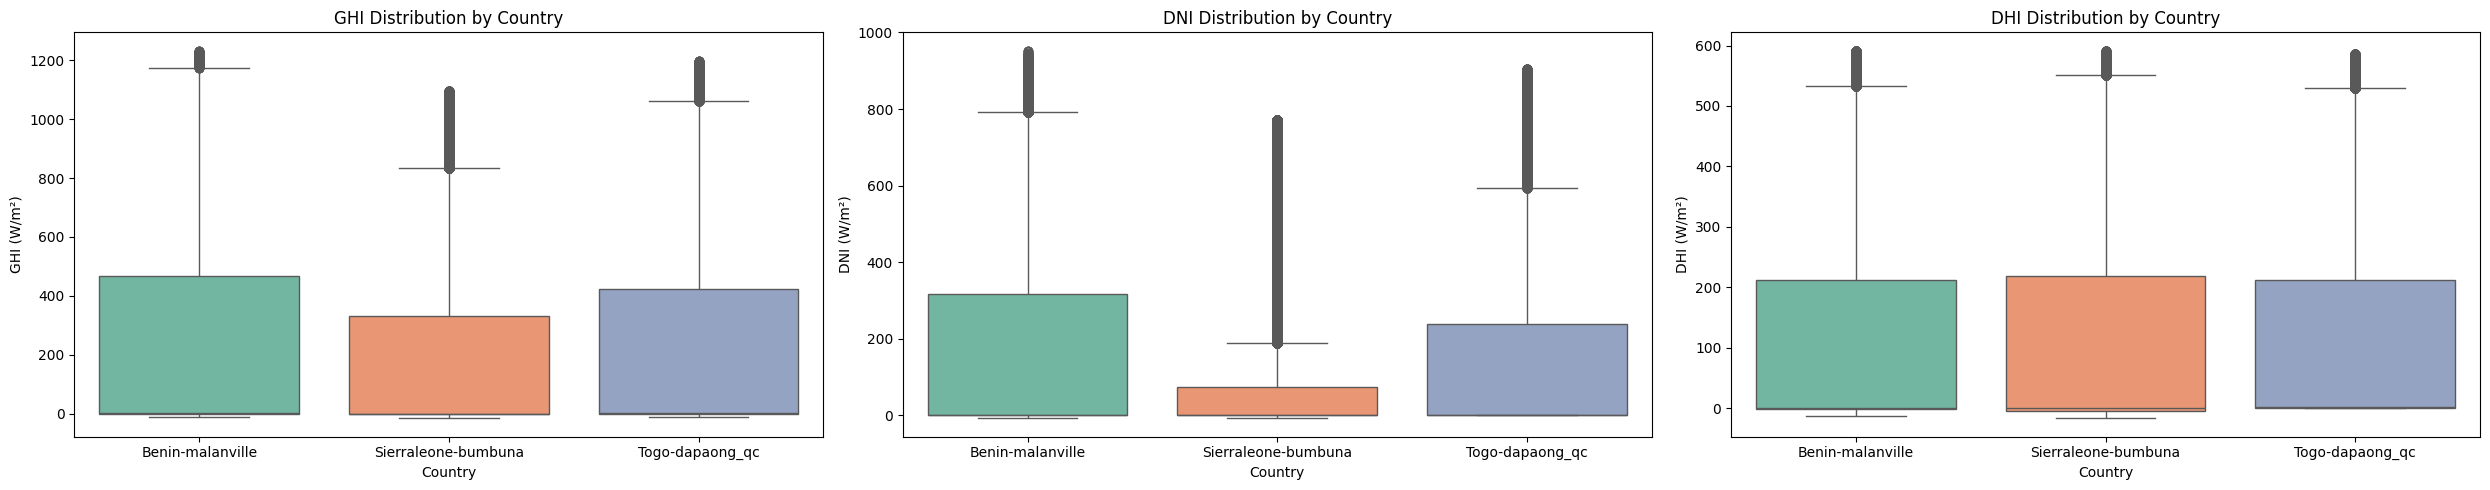

In [37]:
fig,axes = plt.subplots(1,3,figsize=(25,5),sharey=False)
metrics = ['GHI','DNI','DHI']
for i,metric in enumerate(metrics):
    sns.boxplot(x='Country',y=metric,data=combined_df,ax=axes[i],palette='Set2',hue='Country',legend=False)
    axes[i].set_title(f'{metric} Distribution by Country')
    axes[i].set_xlabel('Country')
    axes[i].set_ylabel(f'{metric} (W/m²)')
plt.tight_layout()
plt.show()
# plt.close()

### Summary table

Creating a summary table to compare the data with each other based on mean, median, and standard deviation of GHI, DNI, DHI across countries.

In [22]:
%pip install tabulate
import tabulate 

Note: you may need to restart the kernel to use updated packages.


In [27]:
summary_stats = combined_df.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
summary_stats

GHI                    DNI                    DHI  \
                       mean median     std    mean median     std    mean   
Country                                                                     
Benin-malanville     236.23    0.7  328.29  166.90   -0.1  262.08  111.66   
Sierraleone-bumbuna  185.00   -0.4  279.02  104.13   -0.1  200.95  108.10   
Togo-dapaong_qc      223.86    0.5  317.31  147.98    0.0  247.68  112.78   

                                    
                    median     std  
Country                             
Benin-malanville       0.5  153.10  
Sierraleone-bumbuna   -0.6  153.69  
Togo-dapaong_qc        1.5  151.57

### Kruskal-Wallis test on GHI

The Kruskal-Wallis test is a non-parametric test that can be used to compare the means of two or more groups. We will use this test to compare the GHI data from different countries. We will create a function that takes in the dataframe and performs the Kruskal-Wallis test on the GHI data. The function will return the p-value and the test statistic.

In [31]:
ghi_by_country = [combined_df[combined_df['Country'] == country]['GHI'].values for country in combined_df['Country'].unique()]
stat, p_value = kruskal(*ghi_by_country)
p_value_note = f"Kruskal-Wallis test on GHI: p-value = {p_value:.4f}\n"
if p_value < 0.05:
    p_value_note += "Significant differences in GHI between countries (p < 0.05)."
else:
    p_value_note += "No significant differences in GHI between countries (p >= 0.05)."
print(p_value_note)

Kruskal-Wallis test on GHI: p-value = 0.0000
Significant differences in GHI between countries (p < 0.05).


### Key observations
Analyze summary stats and boxplots (based on typical patterns in solar data)

In [32]:
mean_ghi = summary_stats['GHI']['mean']
std_ghi = summary_stats['GHI']['std']
highest_ghi_country = mean_ghi.idxmax()
highest_variability_country = std_ghi.idxmax()
median_ghi = summary_stats['GHI']['median']
second_highest_median = median_ghi.sort_values(ascending=False).index[1]

observations = f"""
### Key Observations
- **{highest_ghi_country} has the highest average GHI** ({mean_ghi[highest_ghi_country]:.2f} W/m²), indicating strong solar potential.
- **{highest_variability_country} shows the greatest variability in GHI** (std = {std_ghi[highest_variability_country]:.2f} W/m²), suggesting less consistent solar conditions.
- **{second_highest_median} has a high median GHI** ({median_ghi[second_highest_median]:.2f} W/m²), but lower variability than {highest_variability_country}.
"""

### Bar chart for average GHI ranking


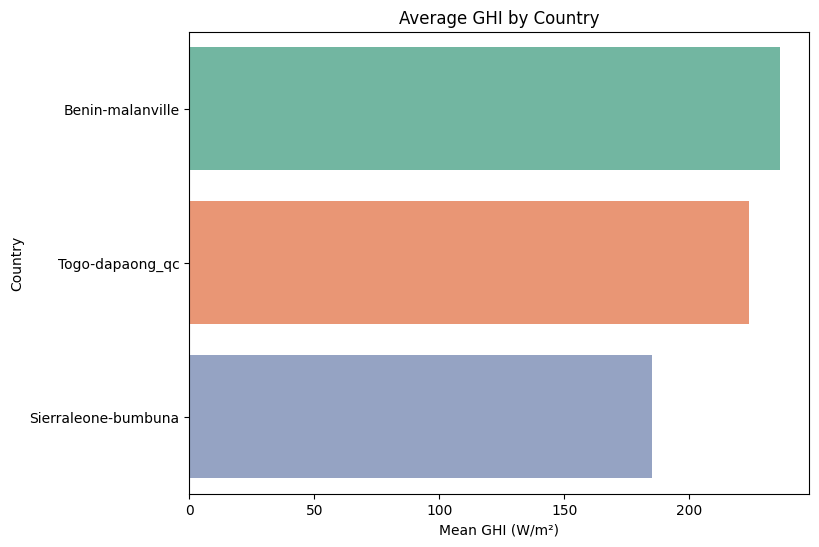

In [36]:
mean_ghi_df = mean_ghi.reset_index()
mean_ghi_df.columns = ['Country', 'Mean_GHI']
mean_ghi_df = mean_ghi_df.sort_values('Mean_GHI', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Mean_GHI', y='Country', data=mean_ghi_df, palette='Set2',hue='Country',legend=False)
plt.title('Average GHI by Country')
plt.xlabel('Mean GHI (W/m²)')
plt.ylabel('Country')
plt.show()

# Save results to a markdown file